In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
def speedup_plot(df, out_fn):
    eserial = min(df[df['name'] == 'earley_serial']['avg_time'])
    lserial = min(df[df['name'] == 'late_serial']['avg_time'])
    par_x = df[df['name'] == 'late_parallel']['threads'] 
    par_y = df[df['name'] == 'late_parallel']['avg_time'].as_matrix()

    fig, ax1 = plt.subplots()
    ax1.set_title('Speedup Over Serial Parsers')

    ax1.set_xlabel('Number of threads')
    ax1.set_xticks(np.arange(2, 22, 2))

    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.annotate('Number of cores', (10.4, 0.2), xycoords=('data', 'figure fraction'), color='purple')

    ax1.plot(par_x, lserial / par_y)
    ax1.set_ylabel('Speedup over serial Late algorithm')

    ax2 = ax1.twinx()
    ax2.plot(par_x, eserial / par_y, linestyle='None')
    ax2.set_ylabel('Speedup over serial Earley algorithm')
    
    fig.canvas.draw()
    ax1.set_yticklabels([l.get_text()+'x' for l in ax1.get_yticklabels()])
    ax2.set_yticklabels([l.get_text()+'x' for l in ax2.get_yticklabels()])

    plt.savefig(out_fn, dpi=300)
    plt.show()

In [3]:
dfs = []
for fn in glob('results/arith_per_item/arith-ambig*csv'):
    ambig = int(fn.split('.')[0].split('-')[-1])
    df = pd.read_csv(fn)
    df['ambig'] = pd.Series([ambig]*len(df))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df = df.set_index('ambig')
df = df.sort_index()
df

,name,avg_time,tot_time,repeats,threads,chart_size
ambig,,,,,,
1,late_parallel,0.033412,1.00020,26,20,30108
2,late_parallel,0.035468,1.00086,25,20,66499
3,late_parallel,0.021619,1.00544,39,20,145564
4,late_parallel,0.042783,1.00688,14,20,316260
5,late_parallel,0.132586,1.17222,7,20,682784
6,late_parallel,0.368406,1.13585,3,20,1466096
7,late_parallel,0.450744,1.62471,3,20,3133248
8,late_parallel,1.668660,1.66866,1,20,6668608
9,late_parallel,2.906140,2.90614,1,20,14141440


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


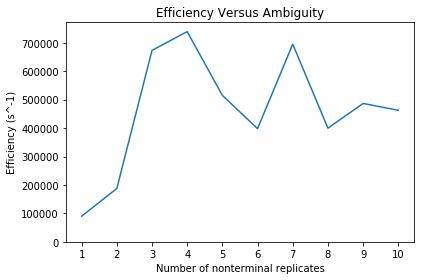

In [4]:
x = range(1, len(df)+1)

avg_time = df['avg_time'].as_matrix()
work = df['chart_size'].as_matrix()
threads = df['threads'].as_matrix()

y = work/(np.minimum(threads, 10)*avg_time)

#y = (df['avg_time'] / df['chart_size'] * 10 * 1000000).as_matrix()

fig, ax = plt.subplots()
ax.set_title('Efficiency Versus Ambiguity')
ax.set_ylabel('Efficiency (s^-1)')
ax.set_xlabel('Number of nonterminal replicates')
plt.plot(x, y)
ax.set_ylim(bottom=0)
ax.set_xticks(np.arange(1, 11, 1))
plt.savefig('../earley_paper/figures/per_item_time.png', dpi=300)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


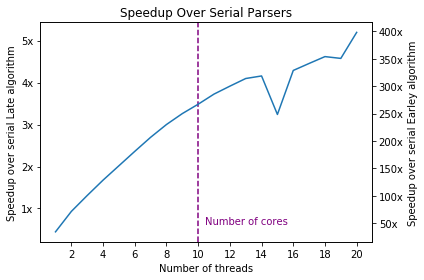

In [5]:
cgw_df = pd.read_csv('results/arith-strong-scaling.csv')
speedup_plot(cgw_df, '../earley_paper/figures/arith_scaling.png')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


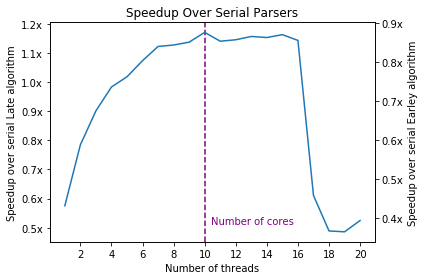

In [6]:
java_df = pd.read_csv('results/java-strong-scaling.csv')
speedup_plot(java_df, '../earley_paper/figures/java_scaling.png')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


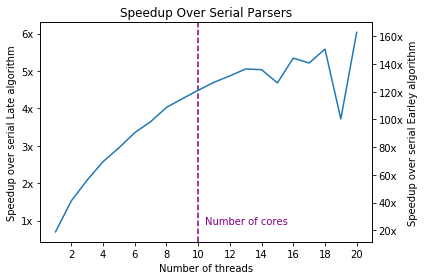

In [7]:
cgw_df = pd.read_csv('results/cgw-strong-scaling.csv')
speedup_plot(cgw_df, '../earley_paper/figures/cgw_scaling.png')

In [11]:
arith_weak_df = pd.read_csv('results/arith-weak-scaling.csv')
java_weak_df = pd.read_csv('results/java-weak-scaling.csv')
cgw_weak_df = pd.read_csv('results/cgw-weak-scaling.csv')

names = ['name','avg_time','tot_time','repeats','threads','chart_size']
arith_weak_serial_df = pd.read_csv('results/arith-weak-scaling.csv-serial', names=names)
java_weak_serial_df = pd.read_csv('results/java-weak-scaling.csv-serial', names=names)
cgw_weak_serial_df = pd.read_csv('results/cgw-weak-scaling.csv-serial', names=names)

In [9]:
def weak_scaling_plot(df, df_serial, out_fn):
    serial_avg_time = df_serial['avg_time']
    serial_work = df_serial['chart_size']
    
    avg_time = df[df['name'] == 'late_parallel']['avg_time'].as_matrix()
    work = df[df['name'] == 'late_parallel']['chart_size'].as_matrix()
    threads = df[df['name'] == 'late_parallel']['threads'].as_matrix()
    
    serial_efficiency = (serial_work/serial_avg_time).as_matrix()
    serial_efficiency = np.append(serial_efficiency, np.repeat(serial_efficiency[9], 10))
    late_efficiency = work/(np.minimum(threads, 10)*avg_time)
        
    fig, ax1 = plt.subplots()
    ax1.set_title('Weak Scaling Efficiency (Increasing Sentence Length)')

    ax1.set_ylabel('Efficiency (% of serial efficiency)')
    ax1.set_xlabel('Number of threads and relative problem size')
    ax1.set_xticks(np.arange(2, 22, 2))

    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.annotate('Number of cores', (10.4, 0.8), xycoords=('data', 'figure fraction'), color='purple')

    ax1.plot(threads, late_efficiency /serial_efficiency  * 100)
    ax1.set_ylim(bottom=0)
    
    fig.canvas.draw()

    plt.savefig(out_fn, dpi=300)
    plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


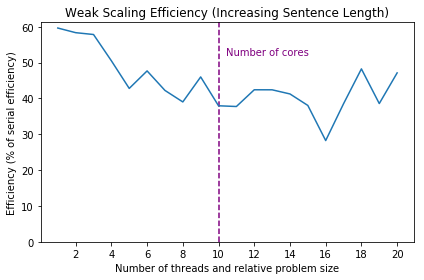

In [13]:
weak_scaling_plot(arith_weak_df, arith_weak_serial_df, '../earley_paper/figures/arith-weak-scaling.png')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


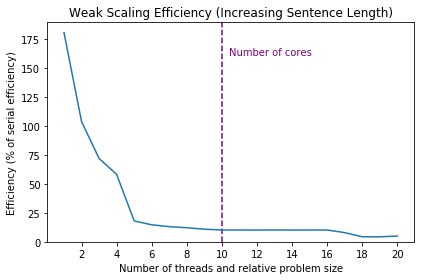

In [14]:
weak_scaling_plot(java_weak_df, java_weak_serial_df, '../earley_paper/figures/java-weak-scaling.png')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


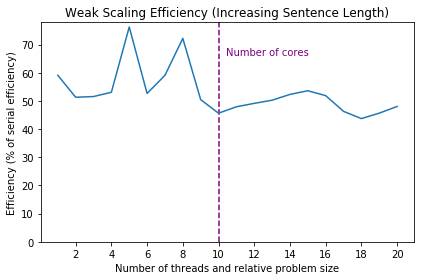

In [15]:
weak_scaling_plot(cgw_weak_df, cgw_weak_serial_df, '../earley_paper/figures/cgw-weak-scaling.png')

In [16]:
def serial_scaling(df, out_fn):
    avg_time = df['avg_time'].as_matrix()
    work = df['chart_size'].as_matrix()
    threads = df['threads'].as_matrix()
            
    fig, ax1 = plt.subplots()
    ax1.set_title('Serial Algorithm Scaling (Increasing Sentence Length)')

    ax1.set_ylabel('Runtime (s)')
    ax1.set_xlabel('Amount of work')
    ax1.set_xticks(np.arange(1, 21, 1))

    ax1.plot(threads, avg_time, label='Actual')
    ax1.plot(threads, df['avg_time'][0] * threads, label='Expected')
    ax1.set_ylim(bottom=0)
    ax1.legend()
    
    fig.canvas.draw()
    ax1.set_xticklabels([l.get_text()+'x' for l in ax1.get_xticklabels()])

    plt.savefig(out_fn, dpi=300)
    plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


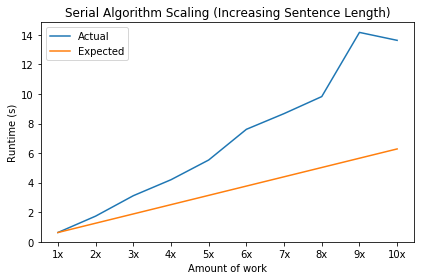

In [17]:
serial_scaling(arith_weak_serial_df, '../earley_paper/figures/arith-weak-scaling-serial.png')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


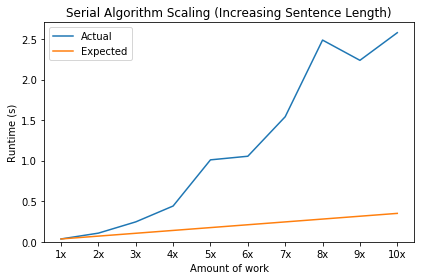

In [18]:
serial_scaling(cgw_weak_serial_df, '../earley_paper/figures/cgw-weak-scaling-serial.png')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


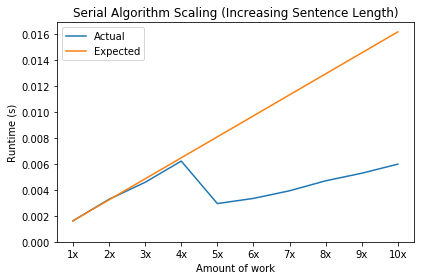

In [19]:
serial_scaling(java_weak_serial_df, '../earley_paper/figures/java-weak-scaling-serial.png')

In [21]:
dfs = []
for fn in glob('results/arith_per_item/arith-ambig*csv'):
    ambig = int(fn.split('.')[0].split('-')[-1])
    df = pd.read_csv(fn)
    df['size_factor'] = pd.Series([ambig]*len(df))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df = df.set_index('size_factor')
df = df.sort_index()
arith_per_length_df = df

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


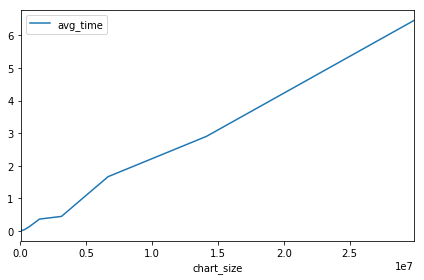

In [22]:
arith_per_length_df.plot(x='chart_size', y='avg_time')
plt.show()